In [272]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_auc_score, f1_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import statistics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.cluster import KMeans

In [309]:
data=pd.read_csv('heart.csv')


In [310]:
#number of missing values
print('number of missing values: ',pd.isnull(data).sum().sum())

number of missing values:  185


In [305]:
print(data.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object


**Imputation with 2 approach**

In [315]:
# *approach 1*: filling categorical features with mode and numerical features with median
# create a copy of dataset to use it later for another approach of imputation
data_c=data
#filling categorical features with mode
data['sex']=data['sex'].fillna(statistics.mode(data['sex'].mode()))
data['cp']=data['cp'].fillna(statistics.mode(data['cp'].mode()))
data['fbs']=data['fbs'].fillna(statistics.mode(data['fbs'].mode()))
data['restecg']=data['restecg'].fillna(statistics.mode(data['restecg'].mode()))
data['exang']=data['exang'].fillna(statistics.mode(data['exang'].mode()))
data['slope']=data['slope'].fillna(statistics.mode(data['slope'].mode()))
data['ca']=data['ca'].fillna(statistics.mode(data['ca'].mode()))
data['thal']=data['thal'].fillna(statistics.mode(data['thal'].mode()))
# filling numerical features with median
data['age']=data['age'].fillna(data['age'].median())
data['trestbps']=data['trestbps'].fillna(data['trestbps'].median())
data['chol']=data['chol'].fillna(data['chol'].median())
data['thalach']=data['thalach'].fillna(data['thalach'].median())
data['oldpeak']=data['oldpeak'].fillna(data['oldpeak'].median())
print('number of missing values: ',pd.isnull(data).sum().sum())
data_co=data
# Scale numerical features
scaler= MinMaxScaler()
scaled_features=scaler.fit_transform(data.drop(['target','sex','cp','fbs','restecg','exang','slope','ca','thal'],axis=1))
#scaled_features = scaler.transform(data.drop(['target','sex','cp','fbs','restecg','exang','slope','ca','thal'],axis=1))
scaled_features=pd.DataFrame(scaled_features,columns=['age','trestbps','chol','thalach','oldpeak'])
data.age=scaled_features['age']
data.trestbps=scaled_features['trestbps']
data.chol=scaled_features['chol']
data.thalach=scaled_features['thalach']
data.oldpeak=scaled_features['oldpeak']
data_co=data
#Split dataset into training set and test set
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(data.drop(['target'],axis=1),data['target'],test_size=0.30) # 70% training and 30% test


number of missing values:  0


In [312]:
# Approach 2: filling numerical features with mean and categoricals with mode
# filling categorical features with mode
data=data_c
data['sex']=data['sex'].fillna(statistics.mode(data['sex'].mode()))
data['cp']=data['cp'].fillna(statistics.mode(data['cp'].mode()))
data['fbs']=data['fbs'].fillna(statistics.mode(data['fbs'].mode()))
data['restecg']=data['restecg'].fillna(statistics.mode(data['restecg'].mode()))
data['exang']=data['exang'].fillna(statistics.mode(data['exang'].mode()))
data['slope']=data['slope'].fillna(statistics.mode(data['slope'].mode()))
data['ca']=data['ca'].fillna(statistics.mode(data['ca'].mode()))
data['thal']=data['thal'].fillna(statistics.mode(data['thal'].mode()))
# filling numerical features with mean
data['age']=data['age'].fillna(data['age'].mean())
data['trestbps']=data['trestbps'].fillna(data['trestbps'].mean())
data['chol']=data['chol'].fillna(data['chol'].mean())
data['thalach']=data['thalach'].fillna(data['thalach'].mean())
data['oldpeak']=data['oldpeak'].fillna(data['oldpeak'].mean())
print('number of missing values: ',pd.isnull(data).sum().sum())
# Scale numerical features
scaler= MinMaxScaler()
scaled_features=scaler.fit_transform(data.drop(['target','sex','cp','fbs','restecg','exang','slope','ca','thal'],axis=1))
#scaled_features = scaler.transform(data.drop(['target','sex','cp','fbs','restecg','exang','slope','ca','thal'],axis=1))
scaled_features=pd.DataFrame(scaled_features,columns=['age','trestbps','chol','thalach','oldpeak'])


data.age=scaled_features['age']
data.trestbps=scaled_features['trestbps']
data.chol=scaled_features['chol']
data.thalach=scaled_features['thalach']
data.oldpeak=scaled_features['oldpeak']

#Split dataset into training set and test set
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data.drop('target',axis=1),data['target'],test_size=0.3) # 70% training and 30% test 

number of missing values:  0


**evaluation step**

In [313]:
#evaluation of types of imputation - the method which is applied for evaluation of both imputation approaches is DecisionTree
# Create DecisionTree classifier function for evaluation
def dt(X_train,y_train):
    
    model= DecisionTreeClassifier(criterion='entropy', max_depth=3 ,min_samples_split=3)
    # Train Decision Tree Classifier
    dt = model.fit(X_train,y_train)
    y_predict_test = dt.predict(X_test)
    acc = accuracy_score(y_test, y_predict_test)
    return print(" Accuracy is :", acc)
print("when imputation of numerical features is median and categoricals is mode (approach1)")
dt(X_train_1,y_train_1)

print("when imputation of numerical features is mean and categoricals is mode (approach2)")
# evaluation
dt(X_train_2,y_train_2)
# after some repeatation and calcuation of expected accuracy of each approach we undertand approach 1 is better, therefore:
X_tarin,X_test,y_train,y_test =X_train_1, X_test_1, y_train_1, y_test_1

when imputation of numerical features is median and categoricals is mode (approach1)
 Accuracy is : 0.8571428571428571
when imputation of numerical features is mean and categoricals is mode (approach2)
 Accuracy is : 0.8021978021978022


**finding outliers**


In [54]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         0.229167
sex         1.000000
cp          2.000000
trestbps    0.188679
chol        0.125571
fbs         0.000000
restecg     1.000000
thalach     0.225806
exang       1.000000
oldpeak     0.258065
slope       1.000000
ca          1.000000
thal        1.000000
target      1.000000
dtype: float64


In [149]:
Q1 = np.percentile(data['trestbps'], 25,  
                   interpolation = 'midpoint')  
  
Q3 = np.percentile(data['trestbps'], 75, 
                   interpolation = 'midpoint')  
IQR = Q3 - Q1  
  
print("Old Shape: ", data.shape)  
  
# Upper bound 
upper = np.where(data['trestbps'] >= (Q3+1.5*IQR)) 
# Lower bound 
lower = np.where(data['trestbps'] <= (Q1-1.5*IQR)) 
  
''' Removing the Outliers '''
data.drop(upper[0], inplace = True) 
data.drop(lower[0], inplace = True) 
  
print("New Shape: ", data.shape)

Old Shape:  (303, 14)
New Shape:  (291, 14)


In [150]:
Q1 = np.percentile(data['age'], 25,  
                   interpolation = 'midpoint')  
  
Q3 = np.percentile(data['age'], 75, 
                   interpolation = 'midpoint')  
IQR = Q3 - Q1  
  
print("Old Shape: ", data.shape)  
  
# Upper bound 
upper = np.where(data['age'] >= (Q3+1.5*IQR)) 
# Lower bound 
lower = np.where(data['age'] <= (Q1-1.5*IQR)) 
  
''' Removing the Outliers '''
data.drop(upper[0], inplace = True) 
data.drop(lower[0], inplace = True) 
  
print("New Shape: ", data.shape)  

Old Shape:  (291, 14)
New Shape:  (290, 14)


In [151]:
Q1 = np.percentile(data['chol'], 25,  
                   interpolation = 'midpoint')  
  
Q3 = np.percentile(data['chol'], 75, 
                   interpolation = 'midpoint')  
IQR = Q3 - Q1  
  
print("Old Shape: ", data.shape)  
  
# Upper bound 
upper = np.where(data['chol'] >= (Q3+1.5*IQR)) 
# Lower bound 
lower = np.where(data['chol'] <= (Q1-1.5*IQR)) 
  
''' Removing the Outliers '''
data.drop(upper[0], inplace = True) 
data.drop(lower[0], inplace = True) 
  
print("New Shape: ", data.shape)  

Old Shape:  (290, 14)
New Shape:  (283, 14)


In [152]:
Q1 = np.percentile(data['thalach'], 25,  
                   interpolation = 'midpoint')  
  
Q3 = np.percentile(data['thalach'], 75, 
                   interpolation = 'midpoint')  
IQR = Q3 - Q1  
  
print("Old Shape: ", data.shape)  
  
# Upper bound 
upper = np.where(data['thalach'] >= (Q3+1.5*IQR)) 
# Lower bound 
lower = np.where(data['thalach'] <= (Q1-1.5*IQR)) 
  
''' Removing the Outliers '''
data.drop(upper[0], inplace = True) 
data.drop(lower[0], inplace = True) 
  
print("New Shape: ", data.shape) 

Old Shape:  (283, 14)
New Shape:  (282, 14)


In [153]:
Q1 = np.percentile(data['oldpeak'], 25,  
                   interpolation = 'midpoint')  
  
Q3 = np.percentile(data['oldpeak'], 75, 
                   interpolation = 'midpoint')  
IQR = Q3 - Q1  
  
print("Old Shape: ", data.shape)  
  
# Upper bound 
upper = np.where(data['oldpeak'] >= (Q3+1.5*IQR)) 
# Lower bound 
lower = np.where(data['oldpeak'] <= (Q1-1.5*IQR)) 
  
''' Removing the Outliers '''
data.drop(upper[0], inplace = True) 
data.drop(lower[0], inplace = True) 
  
print("New Shape: ", data.shape) 

Old Shape:  (282, 14)
New Shape:  (277, 14)


**Decision Tree Classifier**

In [317]:
# Create Decision Tree classifer object
#since DecisionTree doesnt need doesnt need normalization we use unnormalized dataset:
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(data_co.drop(['target'],axis=1),data_co['target'],test_size=0.30) # 70% training and 30% test
model= DecisionTreeClassifier(criterion='entropy', max_depth=3 ,min_samples_split=3)

# Train Decision Tree Classifer
DT = model.fit(X_train_dt,y_train_dt)
y_predict = DT.predict(X_test_dt)
acc = accuracy_score(y_test_dt, y_predict)
print(" Accuracy is :", acc)
print('-------------------------------------------')
print('confusion Matrix :')
print(confusion_matrix(y_test_dt,y_predict))
print(classification_report(y_test_dt,y_predict))
DT.feature_importances_

 Accuracy is : 0.8241758241758241
-------------------------------------------
confusion Matrix :
[[31 11]
 [ 5 44]]
              precision    recall  f1-score   support

           0       0.86      0.74      0.79        42
           1       0.80      0.90      0.85        49

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



array([0.        , 0.        , 0.40056235, 0.        , 0.        ,
       0.        , 0.06423962, 0.0611072 , 0.09321295, 0.11286807,
       0.04996175, 0.21804805, 0.        ])

**Random Forest Classifier**

WITH n_estimators=1 (some random parameter value)
 Accuracy is : 0.8021978021978022
[[32 10]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        42
           1       0.80      0.84      0.82        49

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

WITH n_estimators= 1
 Accuracy is : 0.4945054945054945
[[21 21]
 [25 24]]
              precision    recall  f1-score   support

           0       0.46      0.50      0.48        42
           1       0.53      0.49      0.51        49

    accuracy                           0.49        91
   macro avg       0.49      0.49      0.49        91
weighted avg       0.50      0.49      0.50        91



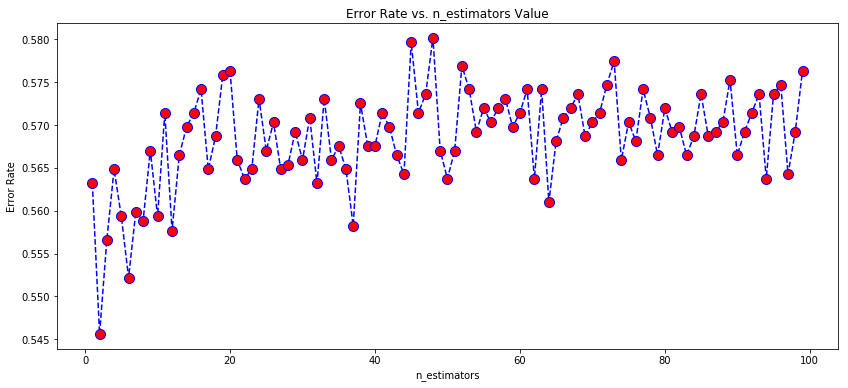

In [320]:
rfc = RandomForestClassifier(n_estimators=1)
rfc.fit(X_train_dt, y_train_dt)
rfc_pred = rfc.predict(X_test_dt)

print('WITH n_estimators=1 (some random parameter value)')
acc = accuracy_score(y_test_dt, rfc_pred)
print(" Accuracy is :", acc)
print(confusion_matrix(y_test_dt,rfc_pred))
print(classification_report(y_test_dt,rfc_pred))
# Find best Parametr for RF
error_rate=[]
for i in range(1,100):
        iteration_error=[]
        #calculate mean of error rate for each senario
        for j in range(20):
            rfc = RandomForestClassifier(n_estimators=i)
            rfc.fit(X_train_dt,y_train_dt)
            pred_i = rfc.predict(X_test_dt)
            iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
# from the plot it is obvious that n_estimators=2 has the lowest mean error rate 
# fit with best n_estimators parameter

print('WITH n_estimators=',2 )
rfc = RandomForestClassifier(n_estimators=1)
rfc.fit(X_train_dt, y_train_dt)
rfc_pred = rfc.predict(X_test)
acc = accuracy_score(y_test_dt, rfc_pred)
print(" Accuracy is :", acc)
print(confusion_matrix(y_test_dt,rfc_pred))
print(classification_report(y_test_dt,rfc_pred))

**KNN Classifier**

when n_neighbors parameter is: 1 (its just some random number)
 Accuracy is : 0.7582417582417582
[[30 12]
 [10 39]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        42
           1       0.76      0.80      0.78        49

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91

WITH n_neighbors= 19
 Accuracy is : 0.8461538461538461
[[31 11]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        42
           1       0.81      0.94      0.87        49

    accuracy                           0.85        91
   macro avg       0.86      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91



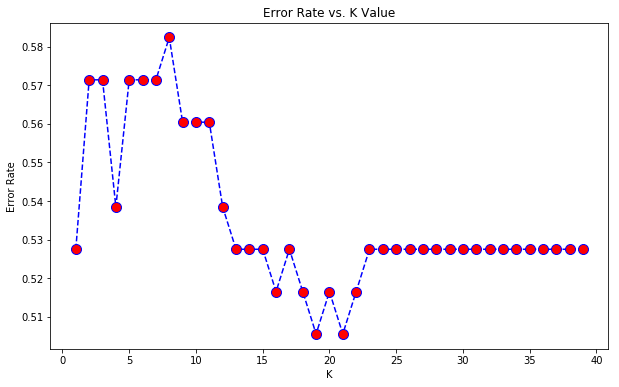

In [323]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_dt,y_train_dt)
pred = knn.predict(X_test_dt)
print( "when n_neighbors parameter is: 1 (its just some random number)")
acc = accuracy_score(y_test_dt, pred)
print(" Accuracy is :", acc)
print(confusion_matrix(y_test_dt,pred))
print(classification_report(y_test_dt,pred))
error_rate = []
# plot erros for different parameter values to get an overall insight
for i in range(1,40):

        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train_dt,y_train_dt)
        pred_i = knn.predict(X_test_dt)
        error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# find best parameter K

print('WITH n_neighbors=', 19 )
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_dt,y_train_dt)
pred = knn.predict(X_test_dt)
acc = accuracy_score(y_test_dt, pred)
print(" Accuracy is :", acc)
print(confusion_matrix(y_test_dt,pred))
print(classification_report(y_test_dt,pred))

**Support Vector Machin Classifier**


In [322]:
svc = SVC()
svc.fit(X_train_dt, y_train_dt)
svc_pred = svc.predict(X_test_dt)
acc = accuracy_score(y_test_dt, svc_pred)
print('With diffault parameters: \n')
print(" Accuracy is :", acc)
print(confusion_matrix(y_test_dt,svc_pred))
print(classification_report(y_test_dt,svc_pred))
# Find best Parameter set
svm_param = {"C": [10, 50, 100, 200, 300, 400, 500,1000],
             "kernel" :['linear', 'poly', 'rbf', 'sigmoid'],
              "gamma": [0.001,0.002,0.01,0.05,0.1,0.11,0.15,0.2]}
grid_svm = GridSearchCV(estimator=svc , param_grid = svm_param )
grid_svm.fit(X_train_dt , y_train_dt)
print('best parameter set is:',grid_svm.best_params_)
best_C= grid_svm.best_params_["C"]
best_kernel= grid_svm.best_params_['kernel']
best_gamma= grid_svm.best_params_['gamma']
# fit best parameter set
svc = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)
svc.fit(X_train_dt, y_train_dt)
svc_pred = svc.predict(X_test_dt)
print('with best parameter set used for SVM: ')
acc = accuracy_score(y_test_dt, svc_pred)
print(" Accuracy is :", acc)
print(confusion_matrix(y_test_dt,svc_pred))
print(classification_report(y_test_dt,svc_pred))



C:\Users\mtahe\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\mtahe\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


With diffault parameters: 

 Accuracy is : 0.8461538461538461
[[30 12]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.94      0.71      0.81        42
           1       0.80      0.96      0.87        49

    accuracy                           0.85        91
   macro avg       0.87      0.84      0.84        91
weighted avg       0.86      0.85      0.84        91

best parameter set is: {'C': 1000, 'gamma': 0.002, 'kernel': 'rbf'}
with best parameter set used for SVM: 
 Accuracy is : 0.8681318681318682
[[33  9]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        42
           1       0.84      0.94      0.88        49

    accuracy                           0.87        91
   macro avg       0.88      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



C:\Users\mtahe\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Bagging Classifier**

C:\Users\mtahe\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\mtahe\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


with n_estimators=1 (some random parameter value): 
 Accuracy is : 0.7802197802197802
[[34  8]
 [12 37]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77        42
           1       0.82      0.76      0.79        49

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



C:\Users\mtahe\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\mtahe\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


with best n_estimators: 5
 Accuracy is : 0.8241758241758241
[[34  8]
 [ 8 41]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        42
           1       0.84      0.84      0.84        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



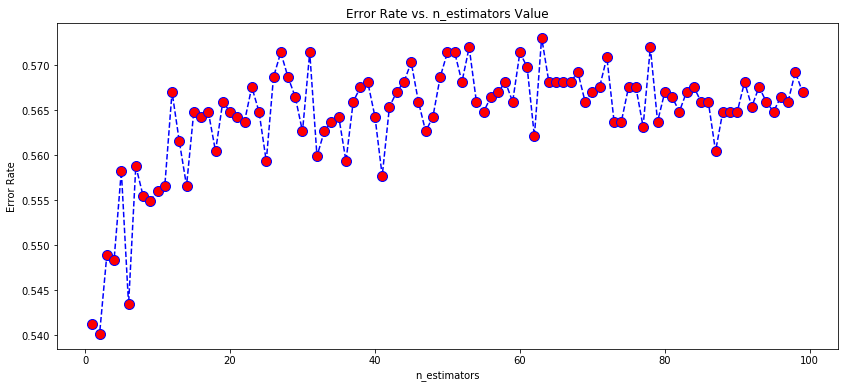

In [324]:
bag=BaggingClassifier(n_estimators=1,oob_score=True)
bag.fit(X_train_dt, y_train_dt)
bag_pred = bag.predict(X_test_dt)
acc = accuracy_score(y_test_dt, bag_pred)
print('with n_estimators=1 (some random parameter value): ')
print(" Accuracy is :", acc)
print(confusion_matrix(y_test_dt,bag_pred))
print(classification_report(y_test_dt,bag_pred))
# Find best Parameter set
error_rate=[]
for i in range(1,100):
        iteration_error=[]
        #calculate mean of error rate for each senario
        for j in range(20):
            bag = BaggingClassifier(n_estimators=i)
            bag.fit(X_train_dt,y_train_dt)
            pred_i = bag.predict(X_test_dt)
            iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
# from the plot it is obvious that n_estimators=2 has the lowest mean error rate 
# fit with best n_estimators parameter=2

bag=BaggingClassifier(n_estimators=2,oob_score=True)
bag.fit(X_train_dt, y_train_dt)
bag_pred = bag.predict(X_test_dt)
acc = accuracy_score(y_test_dt, bag_pred)
print('with best n_estimators: 2')
print(" Accuracy is :", acc)
print(confusion_matrix(y_test_dt,bag_pred))
print(classification_report(y_test_dt,bag_pred))

**Boosting Classifier**

with some random n_estimators like 100 for example:
 Accuracy is : 0.7362637362637363
[[30 12]
 [12 37]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        42
           1       0.76      0.76      0.76        49

    accuracy                           0.74        91
   macro avg       0.73      0.73      0.73        91
weighted avg       0.74      0.74      0.74        91

with best n_estimators: 5
 Accuracy is : 0.8571428571428571
[[32 10]
 [ 3 46]]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        42
           1       0.82      0.94      0.88        49

    accuracy                           0.86        91
   macro avg       0.87      0.85      0.85        91
weighted avg       0.86      0.86      0.86        91



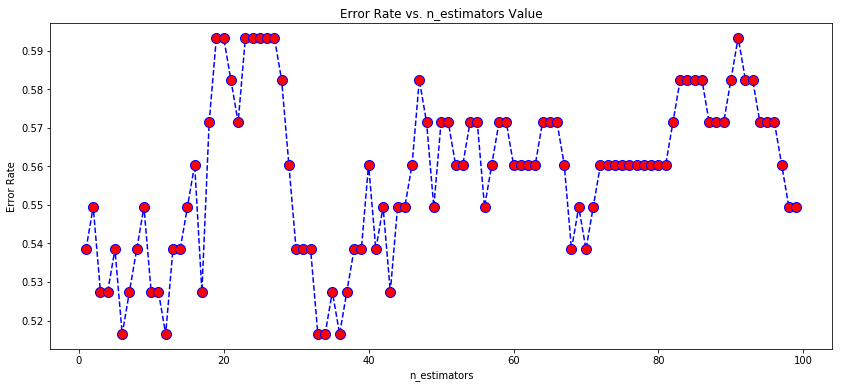

In [325]:
boost=AdaBoostClassifier(n_estimators=100)
boost.fit(X_train_dt, y_train_dt)
boost_pred = boost.predict(X_test_dt)
acc = accuracy_score(y_test_dt, boost_pred)
print('with some random n_estimators like 100 for example:')
print(" Accuracy is :", acc)
print(confusion_matrix(y_test_dt,boost_pred))
print(classification_report(y_test_dt,boost_pred))
# Find best Parameter set
error_rate=[]
for i in range(1,100):
        iteration_error=[]
        for j in range(20):
            bag = AdaBoostClassifier(n_estimators=i)
            bag.fit(X_train_dt,y_train_dt)
            pred_i = bag.predict(X_test_dt)
            iteration_error.append(np.mean(pred_i != y_test))
        error_rate.append(np.mean(iteration_error))
plt.figure(figsize=(14,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. n_estimators Value')
plt.xlabel('n_estimators')
plt.ylabel('Error Rate')
# from the plot it is obvious that n_estimators=6
# fit with best n_estimators parameter

boost=AdaBoostClassifier(n_estimators=6)
boost.fit(X_train_dt, y_train_dt)
boost_pred = boost.predict(X_test_dt)
acc = accuracy_score(y_test_dt, boost_pred)
print('with best n_estimators: 6')
print(" Accuracy is :", acc)
print(confusion_matrix(y_test_dt,boost_pred))
print(classification_report(y_test_dt,boost_pred))

**feature selection with classifiers builtin methods**

In [326]:
# feature selection with random forest builtin function for feature importances
print('with RandomForest Builtin feature importance calculator')
print(rfc.feature_importances_)
X=data_co.drop('target',axis=1)
y=data_co['target']
dfscores = pd.DataFrame(rfc.feature_importances_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print('top five importancest features are sorted below: ')
print(featureScores.nlargest(5,'Score'))  #print 5 best features

print("------------------------------------------------------------")
# feature selection with Decision Tree builtin function for feature importances
print('with DecisionTree Builtin feature importance calculator')
print(DT.feature_importances_)
dfscores = pd.DataFrame(DT.feature_importances_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print('top five importancest features are sorted below: ')
print(featureScores.nlargest(5,'Score'))  #print 5 best features
print("------------------------------------------------------------")
# feature selection with boosting builtin function for feature importances
print('with Boosting Builtin feature importance calculator')
print(boost.feature_importances_)
dfscores = pd.DataFrame(boost.feature_importances_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print('top five importancest features are sorted below: ')
print(featureScores.nlargest(5,'Score'))  #print 5 best features


with RandomForest Builtin feature importance calculator
[0.16367299 0.03912883 0.18923369 0.05116094 0.08345503 0.
 0.02041504 0.09392577 0.04578129 0.11642071 0.03087134 0.04625945
 0.11967491]
top five importancest features are sorted below: 
      Specs     Score
2        cp  0.189234
0       age  0.163673
12     thal  0.119675
9   oldpeak  0.116421
7   thalach  0.093926
------------------------------------------------------------
with DecisionTree Builtin feature importance calculator
[0.         0.         0.40056235 0.         0.         0.
 0.06423962 0.0611072  0.09321295 0.11286807 0.04996175 0.21804805
 0.        ]
top five importancest features are sorted below: 
      Specs     Score
2        cp  0.400562
11       ca  0.218048
9   oldpeak  0.112868
8     exang  0.093213
6   restecg  0.064240
------------------------------------------------------------
with Boosting Builtin feature importance calculator
[0.  0.  0.2 0.  0.2 0.  0.  0.  0.  0.2 0.  0.2 0.2]
top five importanc

**Feature Selection with LogisticRegression and RFE**

In [327]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 5)
X=data_co.drop('target',axis=1)
y=data_co['target']
fit = rfe.fit(X,y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
print('---------------------------------------------------------------------------')
print("So the top 5 best features are :")
print(X.columns[fit.support_])

Num Features: 5
Selected Features: [False  True False  True False False False  True  True  True False False
 False]
Feature Ranking: [7 1 3 1 6 9 8 1 1 1 4 5 2]
---------------------------------------------------------------------------
So the top 5 best features are :
Index(['sex', 'trestbps', 'thalach', 'exang', 'oldpeak'], dtype='object')


**Feature Selection with Univariate Selection**

In [328]:
#apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
X=data_co.drop('target',axis=1)
y=data_co['target']
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print('top 5 best features :\n')
print(featureScores.nlargest(5,'Score'))  #print 5 best features

top 5 best features :

      Specs      Score
11       ca  63.757660
2        cp  60.709113
8     exang  38.914377
9   oldpeak  11.307668
10    slope   9.051501


**KMeans Clustering**

In [334]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_co.drop('target',axis=1))
print('kmeans labels:')
print(kmeans.labels_ ,'\n')
acc=accuracy_score(kmeans.labels_,data_co['target'])
print("Percent of True Labels that Kmeans assigned to each row  : ",acc)


kmeans labels:
[1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 1] 

Percent of True Labels that Kmeans assigned to each row  :  0.7458745874587459
